In [2]:
from glucose_sbi.process_results import load_results, Results
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from pathlib import Path
import torch
import logging
import glucose_sbi
from glucose_sbi.infer_parameters import DeafultSimulationEnv
from glucose_sbi.prepare_priors import Prior
from glucose_sbi.glucose_simulator import run_glucose_simulator
from glucose_sbi.process_results import load_results, Results, simulate_true_and_inferred, plot_simulation
import importlib
from sklearn.metrics import mean_squared_error

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
results_folder = Path("glucose_sbi/results/2025-02-21_11-55")

In [5]:
results = load_results(results_folder)

In [6]:
sim_long_true , sim_long_inferred = simulate_true_and_inferred(results=results, hours = 24, device = device)
mean_sim_inferred = np.mean(sim_long_inferred, axis=0)

#mse = mean_squared_error(sim_long_true, sim_long_inferred)

In [8]:
print(mean_sim_inferred.shape)
print(sim_long_true.shape)

(481,)
(481,)


In [9]:
mse  = mean_squared_error(sim_long_true, mean_sim_inferred)
print(mse)

78.1551284790039


In [ ]:
importlib.reload(glucose_sbi)

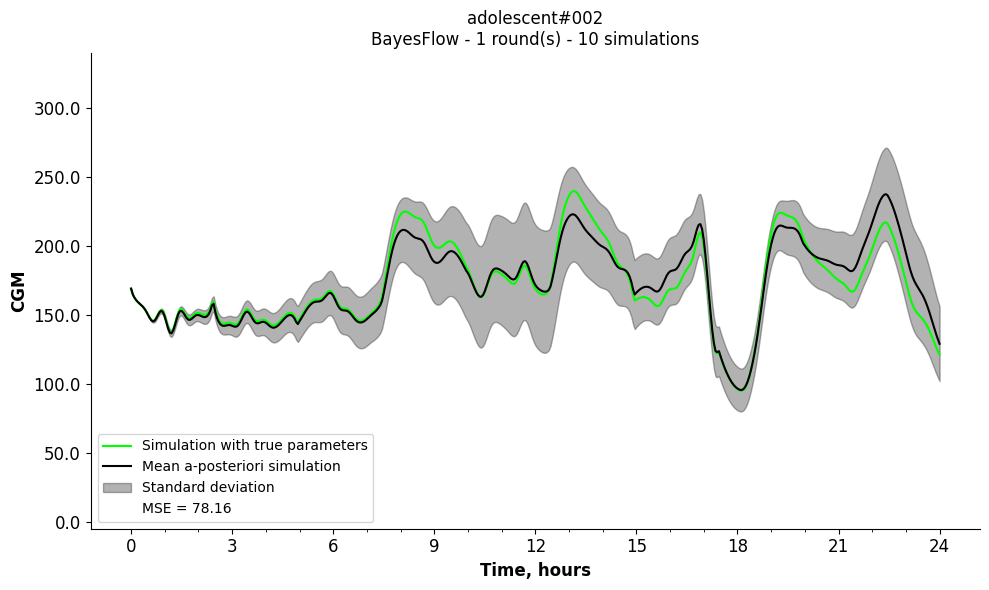

In [10]:
fig, ax = plot_simulation(sim_long_true, sim_long_inferred, results.config, mse = mse)

In [ ]:
results_folder = Path("glucose_sbi/results/2025-02-17_18-34")
results = load_results(results_folder)
x_true = results.true_observation
posterior_samples = results.posterior_samples
true_parameters = results.true_params
default_settings = results.default_settings
prior = results.prior
theta_true = torch.tensor([value for key, value in true_parameters.items()]).to(device)

In [ ]:
pathos = True

In [ ]:
sim_long_true = run_glucose_simulator(theta=[theta_true], default_settings=default_settings, prior = prior, device=device, hours = 72)
sim_long_inferred = run_glucose_simulator(theta=posterior_samples, default_settings=default_settings, prior = prior, device=device, hours = 72)

In [ ]:
fig, ax = plot_simulation(sim_long_true, sim_long_inferred)